# **DTSC 5501 Group Project #1: Campus Event Scheduling System**

Group 9: Swejal Gabhane, Abhinav Mehrotra, Erin Noonan, John Shuford

## Project Description

You’ve been hired to design a lightweight scheduling system for managing campus events (talks, hackathons, concerts, exams, etc.). The system must allow adding, searching, sorting, and conflict-checking events efficiently as the event list grows from a handful to thousands.

Your group will design and implement custom data structures and algorithms to power the system, compare their performance, and present results.

## Project Assumptions

The following assumptions were made as part of the team's approach to developing a solution to the Campus Event Scheduling System:

-	Event date and time can be represented as a single value using a timestamp, which represents the date and time as an integer that counts the seconds elapsed. For the datetime library the function timestamp() is seconds elapsed since January 1, 1970, 00:00:00 UTC.

-	All events are set to a single fixed length of time and starting on the hour, therefore date/time conflicts are only identified by date and scheduled start time. A longer event would be required to be scheduled as multiple events.

-	A scheduling conflict exists when two or more events have the same specified start time and the same location.


## Part A. Event Storage Structures

- Implement two independent ways of storing events (Array-based list and Singly linked list)

- Support operations: insert, delete, search_by_id, list_all

- Compare the theoretical complexities of operations


### Event Class

In our initial meeting we decided on having a class structure which goes as follows:


* An event class which stores all information about an event like ID, title, date, time and location as parameters.

```
class Event():
    def __init__(self, id:int, title:str = None, date:str = "", time:str = "", location:str = ""):
        self.id = id
        self.title = str(id) if title is None else title
        self.date = date
        self.time = time
        self.location = location
        self.timestamp = self.make_timestamp()
```



* To initalize object of said class, we will need to pass in the parameters in order.

* This class will also have getter and setter function to either return or change values of said parameters:


```
 def getDate(self):
        return self.date

def setDate(self, date:str):
      self.date = date
      self.timestamp = self.make_timestamp()
```

* We also added a parameter called timestamp which gives us a unique int by adding the int values of date and time.


```
def make_timestamp(self):
        if not self.date or not self.time:
            return None
        d = self.date.replace("-", "")
        t = self.time.replace(":", "")
        return int(d+t)

  def getTimestamp(self):
        return self.timestamp
```


### Data Structures

We also decided on having an abstract class **EventStore**, which both our data structures class will implement and added methods like:


```
from abc import ABC, abstractmethod

class EventStore(ABC):
    
    @abstractmethod
    def insert_event(self, event):
        pass

    @abstractmethod
    def delete_event(self, event_id:int):
        pass

    @abstractmethod
    def search_by_id(self, event_id:int):
        pass

    @abstractmethod
    def list_all_events(self):
        pass

    @abstractmethod
    def insertion_sort(self):
        pass

    @abstractmethod
    def insertion_sort_by_id(self):
        pass
    
    @abstractmethod
    def merge_sort(self):
        pass
    
    @abstractmethod
    def quick_sort(self):
        pass
    
    @abstractmethod
    def linear_search(self):
        pass


    @abstractmethod
    def binary_search(self):
        pass
```

* **ArrayList Implementation**

For the ArrayList Implementation we created a wrapper class which contains an array as a parameter:


```
class ArrayListEventStore(EventStore):

    def __init__(self, size:int):
        self.events = []
        self.size = size

```

We implemented methods like insert_event, delete_event, search_by_id, and list_all_events to make it functional.


* **LinkedList Implementation**

For the LinkedList Implementation we created a Node class that stores an event as the data inside.



```
import Event

class Node():
    def __init__(self, event:Event.Event):
        self.event = event
        self.next = None
```

We then created a LinkedListEventStore class which initialises a head node and the size of the linked list.



```
from EventStore import EventStore
from Event import Event
from Node import Node

class LinkedListEventStore(EventStore):

    def __init__(self):
        self.head = None
        self.size = 0
    
```

Below is our implementation of the default methods:


```
 def insert_event(self, event):
        new_node = Node(event)
        if self.head is None:
            self.head = new_node
        else:
            current = self.head
            while current.next:
                current = current.next
            current.next = new_node

        self.size += 1

    def delete_event(self, event_id):

        prev = None
        current = self.head

        while current:
            if current.event.id == event_id:
                if prev:
                    prev.next = current.next
                else:
                    self.head = current.next
                self.size -= 1
                return True
            prev = current
            current = current.next
        return False
    
    def search_by_id(self, event_id):

        current = self.head
        while current:
            if current.event.id == event_id:
                return current.event
            current = current.next
        return None
    

    def list_all_events(self):
        events = []
        current = self.head
        while current:
            events.append(current.event)
            current = current.next
        return events
```











## Part B. Sorting Events
- Implement three sorting algorithms (insertion, merge, quick)
- Sort events by date and time
- Measure runtime for n = 50, 500, 5000, 50,000
  - Use both array and linked list backends
  - Plot performance
  - Explain crossovers

Sorting is essential when it comes to being able to quickly and effenciently run an algorithm over a large data set.

#### Insertion Sort

###### Definition:

- To complete an insertion sort you begin with the first element. A singular element is by definition already sorted and will serve as the first element in your *sorted array / list*. Then you move to the next element and *insert* it at the front. If it is smaller then the next element it remains where it is, if it is larger, it will be swapped with the element next to it to putting the elements in order. This process of *inserting* elements at the front of the sorted portion then shifting the element down until elements are sorted will continue until all the algorithm has worked throgh all of the elements.

###### Implementation:

- Array:
  - The implementation was pulled from the solution given by professor. In this implementaton we iterate through the elemnts comparing the element to its predecessors. When we run into a situation where an element is less then its predessor, we iterate backwards shifting the larger elements forward then placing the "key" element where it needs to be in the sorted portion of the array. This process continues until all elements are in the correct position.

``` python
def insertion_sort(self):
  for i in range(1, len(self.events)):
    key = self.events[i]
    j = i - 1
    while j >= 0 and key.getTimestamp() < self.events[j].getTimestamp():
        self.events[j + 1] = self.events[j]
        j -= 1
    self.events[j + 1] = key
```

- Linked List:
  - This implementation was developed by John over the course of two nights struggling and toiling with the structure of a linked list. Much time spent going back and forth between an implementation that swapped the pointers to the one that swapped the data inside those nodes. I was eventually able to get the solution that swapped the data inside the nodes to work. This implmentation was very similar to that of the array starting with the first element and iterating through until we reached a point where the data in the preceding node was less then its predecessor. When that occured, I swapped the data into the head node. I then bubbled that value through until it it was in the correct position. Moving through the list until it all the data was sorted!

``` python
def insertionSortLL():
      #set the varible current to the first node  
      current = head
      
      #begin iterating through the linked list
      while current:
          # create your temp variables
          key = current.next
          prev = current

          #if there isnt a next node break from the loop
          if key == None:
              break
          
          # if while iterating we notice that the next one is less then the first one we have some sorting to do.
          while prev and key.data < prev.data:
              # create a temp variable to start from the first node
              sortCurrent = head

              #swap the current to the head of the list
              sortCurrent.data, prev.data = prev.data, sortCurrent.data
              
              #iterate through
              while sortCurrent:
                  # if there isnt a next break out of this loop
                  if sortCurrent.next == None:
                      break
                  
                  # where we see the current bigger then its neighbor switch them
                  if sortCurrent.data > sortCurrent.next.data:
                      sortCurrent.data, sortCurrent.next.data = sortCurrent.next.data, sortCurrent.data
                  sortCurrent = sortCurrent.next

              key.data, prev.data = prev.data, key.data
          current = current.next
```

#### Merge Sort

- Definition:
  - Merge sort begins by partitioning or separating all elements into individual lists. Then, by comparing one element to the one next to it, you sort and merge those sorted lists together. You keep on repeating this action recursively until all of the elements are in their correct spots.

- Array
  - The Merge Sort implementation for arrays was pulled from that given to us by the professor. It starts if the length of the array is greater than one, it finds the midpoint, breaks it up into left and right, and then recursively calls until the length of the array is less than one. Once we move past that point, we can then compare the left array and the right array, bringing those arrays back together now that they are sorted against each other.

``` python
def merge_sort(self):
  if len(self.events) > 1:
      mid = len(self.events) // 2
      left_half = self.events[:mid]
      right_half = self.events[mid:]

      left_store = ArrayListEventStore(len(left_half))
      left_store.events = left_half
      left_store.merge_sort()

      right_store = ArrayListEventStore(len(right_half))
      right_store.events = right_half
      right_store.merge_sort()

      i = j = k = 0

      while i < len(left_store.events) and j < len(right_store.events):
          if left_store.events[i].getTimestamp() < right_store.events[j].getTimestamp():
              self.events[k] = left_store.events[i]
              i += 1
          else:
              self.events[k] = right_store.events[j]
              j += 1
          k += 1

      while i < len(left_store.events):
          self.events[k] = left_store.events[i]
          i += 1
          k += 1

      while j < len(right_store.events):
          self.events[k] = right_store.events[j]
          j += 1
          k += 1
```

#### Quick Sort

- Definition:
  - The QuickSort works by using a partition. You can set the partition to wherever you want to, and then the partition puts all of the data that is less than the element that you chose as your pivot below it and all of the elements that are greater above it. It continues to run this recursively until all of the nodes are in their correct positions and then merges all of those nodes back into one.
  
- Implementation:
  - The implementation for QuickSort on a singly linked list was one that I was able to pull from geeksforgeeks.com. The first function gets the tail, iterating through until there is no other one and returning the last node of the list. The next one partitions the list by starting with the first element and then swapping data that is less than the pivot's data. Next, we have the QuickSort helper, having a couple of calls. The first one finding the pivot node. The next recursive call sorts those that are less than the pivot, then those that are to the right. And then finally, we have a main function call that finds the tail, sorts the list, and then returns the new head of the singly linked list.

``` python
def getTail(cur):
    while cur and cur.next:
        cur = cur.next
    return cur

# Partitions the list taking the first element as the pivot
def partition(head, tail):

  # Select the first node as the pivot node
  pivot = head

  # 'pre' and 'curr' are used to shift all
  # smaller nodes' data to the left side of the pivot node
  pre = head
  curr = head

  # Traverse the list until you reach the node after the tail
  while curr != tail.next:
      
      # If current node's data is less than the pivot's data
      if curr.data < pivot.data:
          
          # Swap the data between 'curr' and 'pre.next'
          curr.data, pre.next.data = pre.next.data, curr.data
          
          pre = pre.next
      
      curr = curr.next

  # Swap the pivot's data with 'pre' data
  pivot.data, pre.data = pre.data, pivot.data
  
  # Return 'pre' as the new pivot
  return pre

def quickSortHelper(head, tail):

    # Base case: if the list is empty or consists of a single node
    if head is None or head == tail:
        return
    
    # Call partition to find the pivot node
    pivot = partition(head, tail)

    # Recursive call for the left part of the list (before the pivot)
    quickSortHelper(head, pivot)

    # Recursive call for the right part of the list (after the pivot)
    quickSortHelper(pivot.next, tail)

# The main function for quick sort.
# This is a wrapper over quickSortHelper
def quickSort(head):

    # Find the tail of the list
    tail = getTail(head)
    
    # Call the helper function to sort the list
    quickSortHelper(head, tail)
    return head

## Part C. Searching and Conflict Detection

### Searching
- Implement linear search and binary search for events by ID
- Compare runtimes on sorted and unsorted data

In [ ]:
class Search:
    def __init__(self):
        pass

    def linear_search(self, linked_list, target_id):
        current = linked_list.head

        while current:
            if current.event["id"] == target_id:
                return current.event
            current = current.next

        return None

    def binary_search(self, sorted_events, target_id):
        low = 0
        high = len(sorted_events) - 1

        while low <= high:
            mid = (low + high) // 2
            mid_id = sorted_events[mid]["id"]
            if mid_id == target_id:
                return sorted_events[mid]
            elif mid_id < target_id:
                low = mid + 1
            else:
                high = mid - 1

        return None

Overview:

There are two methods in the Search class for finding an event based on its unique identifier (id) in a linked list and a sorted list with appropriate algorithms:

linear_search: For unsorted linked lists.

binary_search: For sorted lists (arrays).

1. Linear Search

Description:
Linear search goes through each element of the dataset one by one until it finds the target id.

How It Works:

Starts at the head of the linked list.
Iterates through each node sequentially using the .next pointer.
Compares the event["id"] in each node to the target_id.
Returns the matching event dictionary when found.
Returns None if the target is not found in the list.

Use Case:

Best used when data is stored in an unsorted linked list, as binary search cannot be used in such data structures due to the lack of random access.

2. Binary Search
Method:
def binary_search(self, sorted_events, target_id):
Description:
This function performs a binary search on a list of event dictionaries pre-sorted by the id field.

How It Works:

Defines two pointers: low (start of list) and high (end of list).
Repeatedly calculates the midpoint and checks the mid["id"] against the target_id.
Re-defines the search range depending on whether the mid["id"] is greater than or less than the target_id.
Returns the matching event dictionary if found.
returns None if target does not exist.

Use Case:

Best when dataset is in a list sorted by id so that it is quicker for search performance (O(log n)).

### Conflict detection
- Write an algorithm that checks if two or more events overlap in time on the same date
- Must run efficiently for up to 10,000 events
- Discuss complexity and optimizations

An algorithm was developed to identify scheduling conflicts within a list of events. Each event is defined by a unique identifier, date, time, location, and event title.  In order to simplify the sorting of events by date and time, the date and time components were combined into a UTC time stamp. This enables sorting by a single value rather than multiple values. The efficiency of the time stamp also applies for conflict detection, as it is possible to check for overlap in date and time as a single check instead of two. This consolidation reduces the complexity of the conflict detection process because multiple loops are not required to step through the date and time individually.

The algorithm is configured to track the timestamp – location combinations that have already been checked, and if the timestamp – location combination exists in the list of checked combinations, the algorithm skips checking that combination against the remaining list of scheduled events. The algorithm is configured for what is effectively a linear search for conflicts and assumes that the list is unsorted. For conflict detection within a list sorted by date and time, comparison for conflicts is only required for the events that match the timestamp being checked and the algorithm can truncate the search set once the timestamp in the list no longer matches the next timestamp in the list.
If conflict identification were incorporated with the insertion of a new event, then the search to find the location to insert the new event in a sorted list would similarly identify the location of the events that need to be evaluated for conflicts. For insertion of the event in an unsorted list, the previously discussed linear search would be applicable.

Individual instances of the conflict detection algorithm were created to process an array and a linked list, respectively. The conflict detection algorithm takes the list and a flag for whether or not to print out a list of the identified conflicts as inputs. Counters and blank arrays for data collection are initialized. Then the first loop is initiated to step through each event in the list and check the date/time/location combination for conflicts. The combinations checked are tracked and each new combination is checked against the previously checked ones. If the combination is already in the list, it is skipped and moves on to the next one. With the "check point" combination selected, then a second loop steps through the list, comparing the "check point" to each list entry. A list of date/time/location combinations with conflicts identifed, as well as the individual id numbers are maintained and reported out at the end of the process along with the time required to execute the checks.



Three sets of tests were run for finding conflicts in each the array and linked lists.

The first test was to generate a list of known events with known conflicts and to run the algorithm to verify that it identified the established conflicts. This is testKnownDataArray for arrays and testKnownDataLinked for linked list.

The second test was to generate a list of random events and to run the algorithm. This test was conducted for 10 events, which would not be expected to yield conflicts, and then for 500 events, which would be expected to yield some small number of conflicts. This test is testRandomDataArray for arrays and testRandomDataLinked for linked list.

The third test was to run tests on random event sets for different numbers of events. This test is test_mult_cases_array for arrays and test_mult_cases_linked for linked lists and these functions call testRandomDataArray and testRandomDataLinked, respectively to execute the conflict checking. The results from each run were collected and a plot to compare the execution times for each type of list across the various set sizes was generated. Of note, there was not a significant difference in execution times between the two types of list. The curves do demonstrate the O(n^2) time complexity introduced by the nested loops used to complete the checks. Both algorithms demonstrated reasonable efficiency for a set of 10,000 events. The array checks took 4.32 seconds and the linked list checks took 4.28 seconds.

See below for outputs and plots from the conflict detection testing.

Array Conflict Detection Testing

Testing of Known Data Set

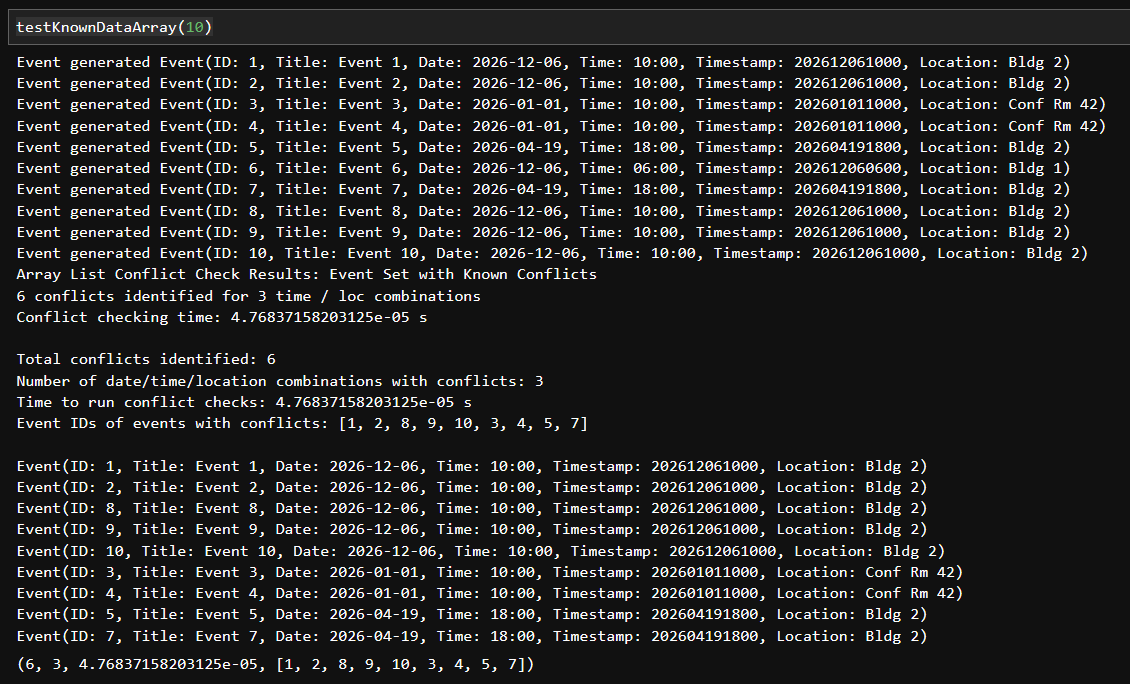

Testing of Random Data Set (10 and 500 events)

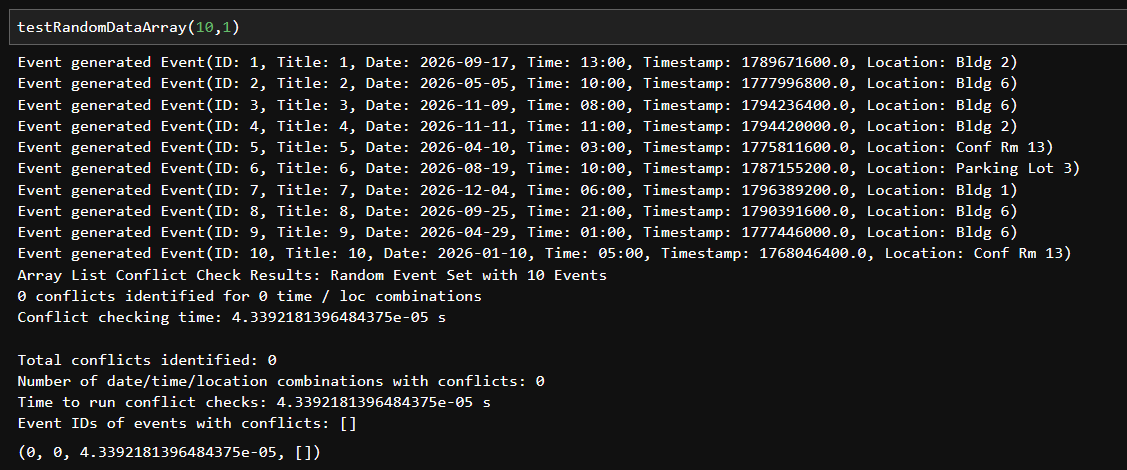

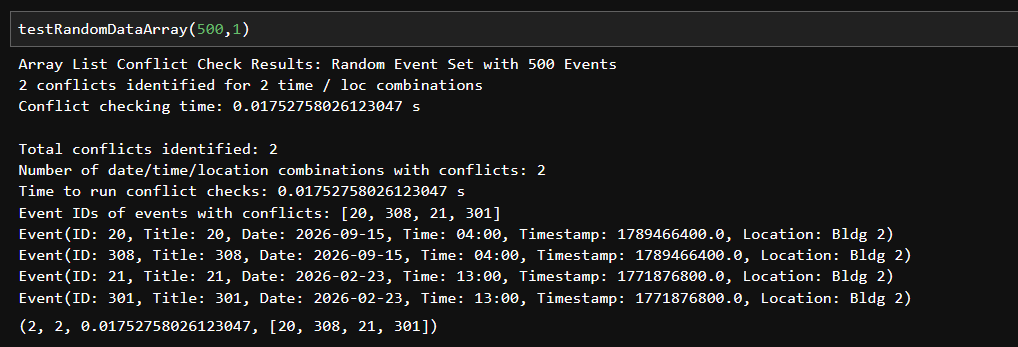

Testing of Multiple Sizes of Data Sets

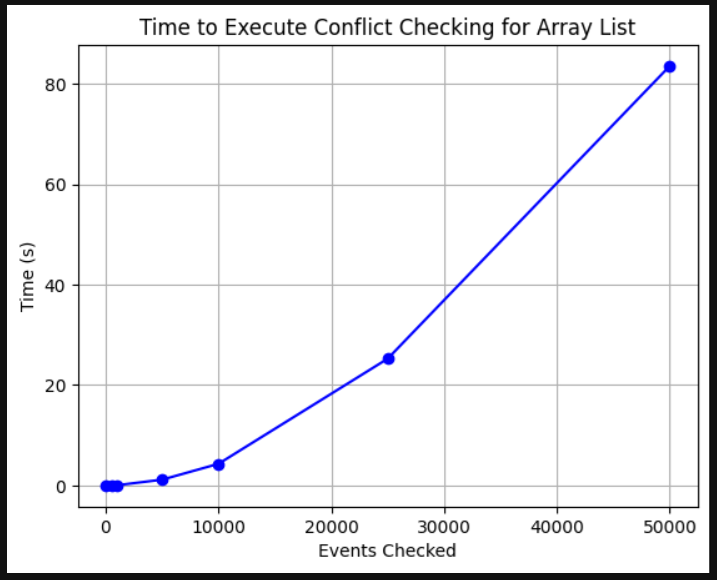

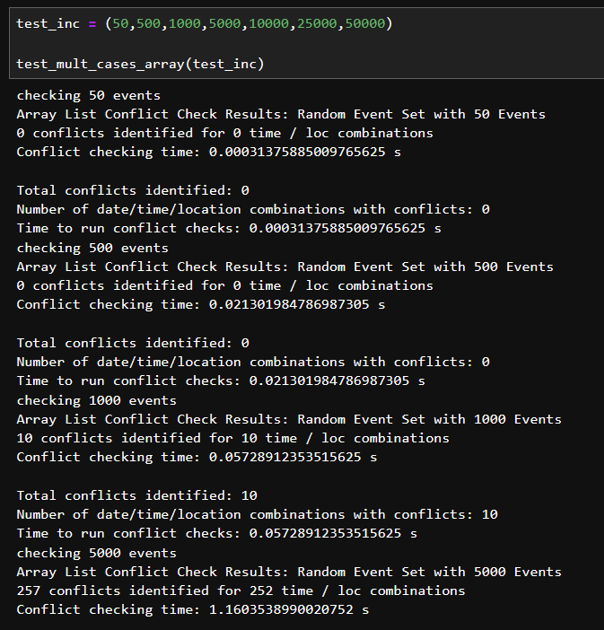

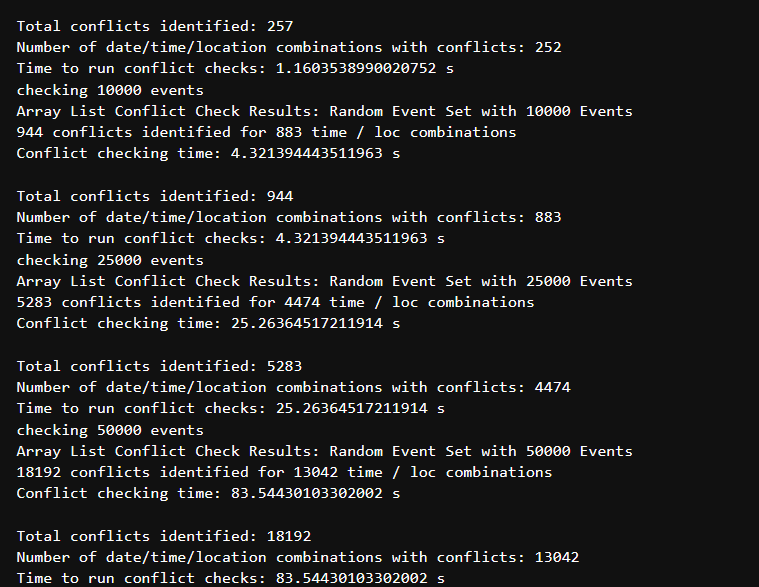

Linked List Conflict Detection Testing

Testing of Known Data Set

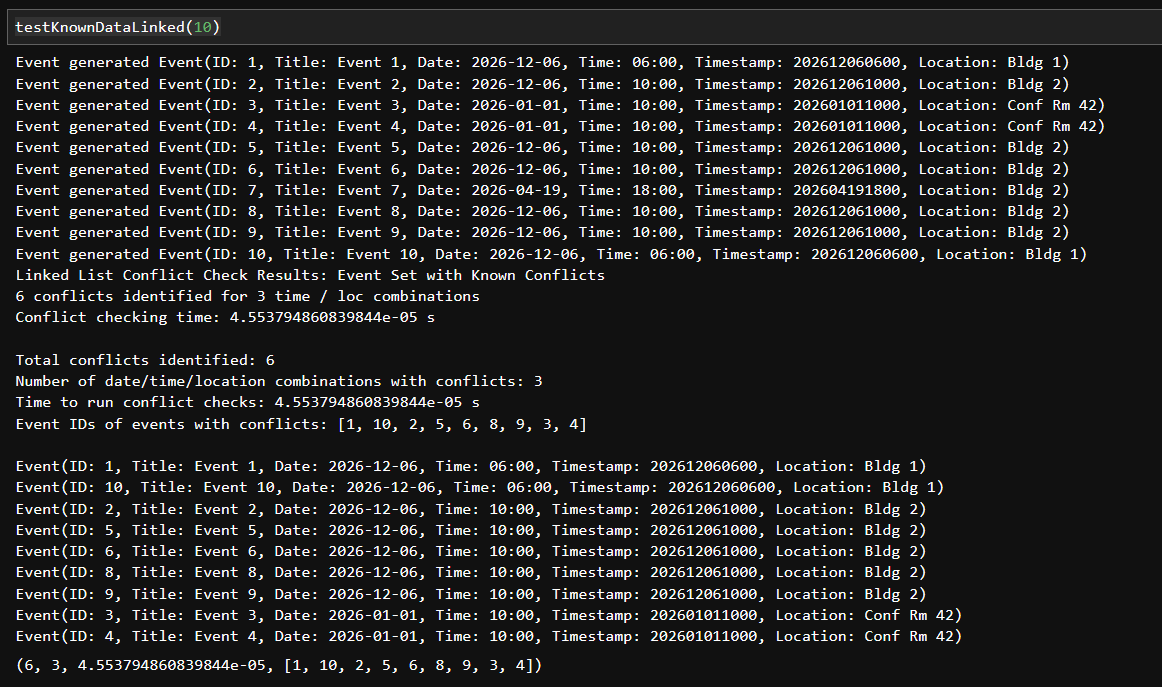

Testing of Random Data Set (10 and 500 events)

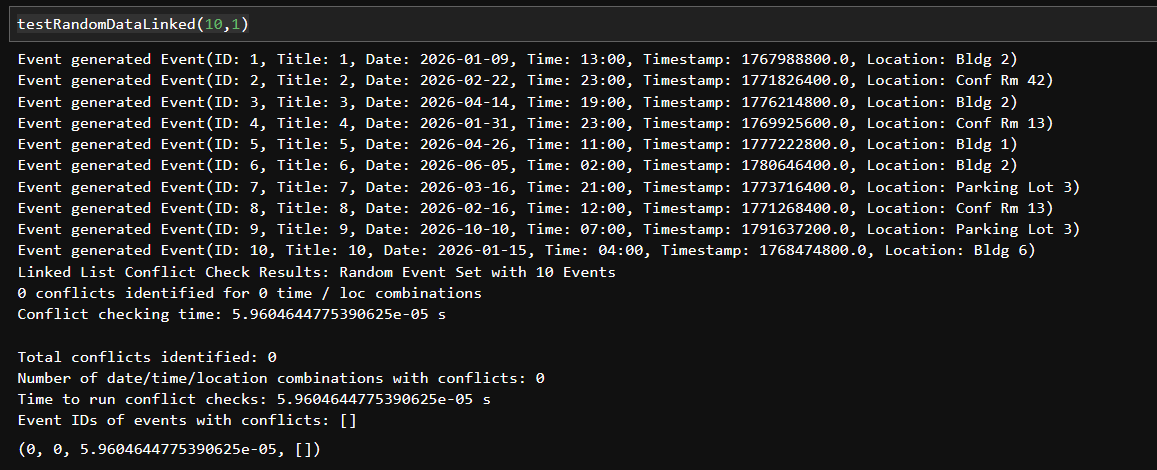

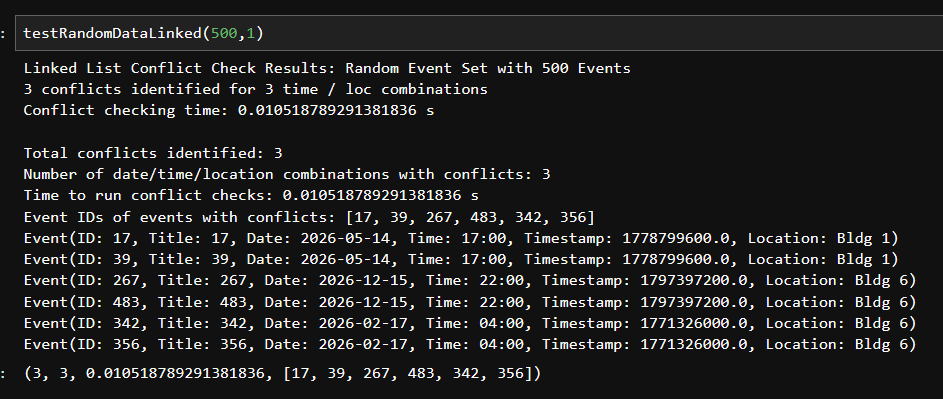

Testing of Multiple Sizes of Data Sets

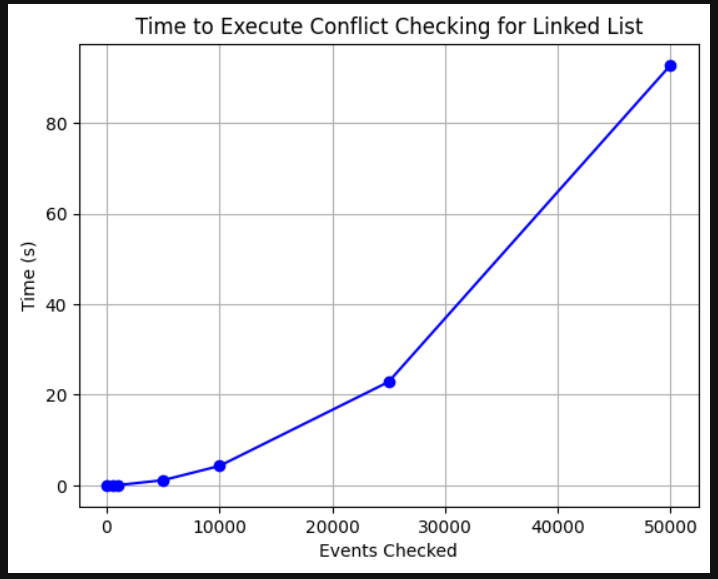

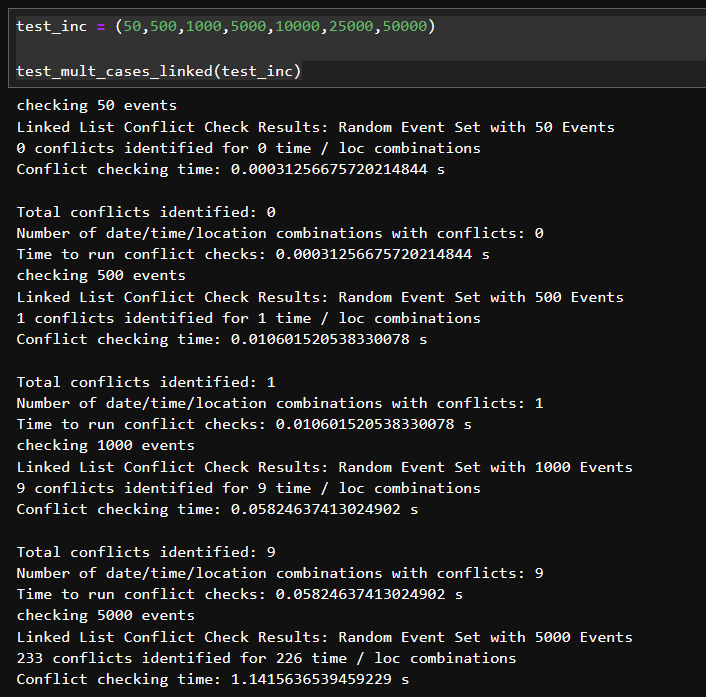

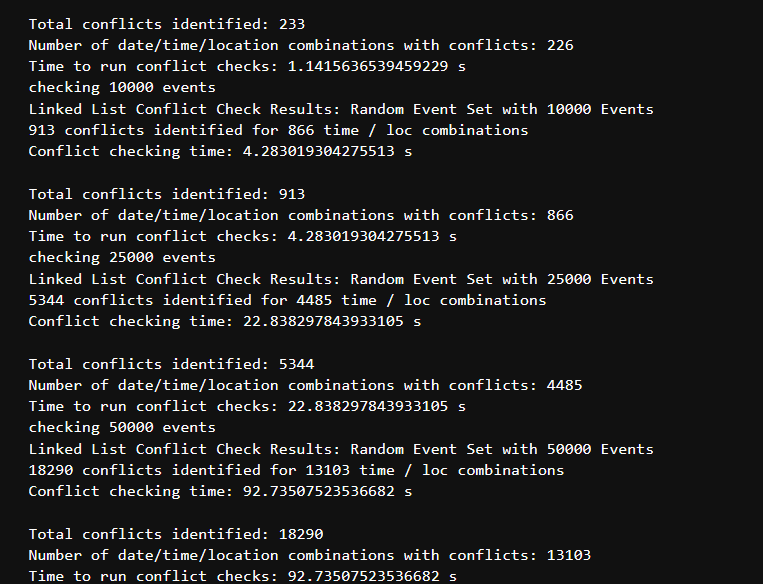

As was mentioned above, these algorithms have time complexity of O(n^2) due to the use of nested loops to check the contents of the list against itself. By keeping track of what combinations have already been checked, the algorithm can reduce execution time, but it does not reduce the overall time complexity.

If the algorithm was implemented on a data set that was known to be sorted either by date/time or by location, additional steps could be taken to provide for limiting the conflict checks to only the applicable section of the array. This could include using a search to find where to start the conflict checks and then terminating checks once the primary check value no longer equals the "check point" because the sort means that there are no other entries with that value. If the list was indexed, by date or location, this would also improve the efficiency of the overall process by narrowing the subset of events required to be checked for conflicts.
If the conflict check was integrated into the process of adding a new event, then the time complexity would be O(n) because the search would only have one "check point" to compare to the contents of the list. This process would also be able to leverage search algorithms to narrow the required number of events to check.

## Part D. Scalability Challenge
For 1,000,000 events:
 - Estimate memory usage for array vs linked list
 - Suggest optimizations (e.g., indexing, hybrid structures)
 - Sketch a design for a parallel conflict detection (multi-core idea)


### Insight

#### Memory: Array vs LinkedList

* **Event Object:**
A safe estimate would be to say that 1M event objects will cost us around 500MB of memory. A python object header + 2 ints(ID and timestamp) + 4 strs(title, date, time, location) + references ~ 400 - 700 bytes oer event object.

* **ArrayList Container:**
A Python list will store only pointers which is ~8 bytes/ref. So 8 bytes x 1M = 8MB, total ArrayList memory cost ~500-550MB

* **LinkedList Container:**
Each node will add a Python object and 2 references(event and next) ~50-80 bytes per node. So for 1M nodes and estimated memory will be 600MB+

In conclusion




### Parallel Conflict Detection
Conflict detection for a very large data set (~1,000,000 events) could leverage parallel conflict detection in a couple of different scenarios. In the event that the data set is unsorted, then the data set could be divided among multiple cores and the search for duplicates would be conducted simultaneously across different subsets of the data, reducing the search time. In this case, events would likely be grouped by event ID range. This is shown in a general form in the figure below with the example of two cores and divisions of the data set for simplicity. With a 1,000,000 event data set, it would be desirable to divide the data into several more groups to improve the overall execution time.



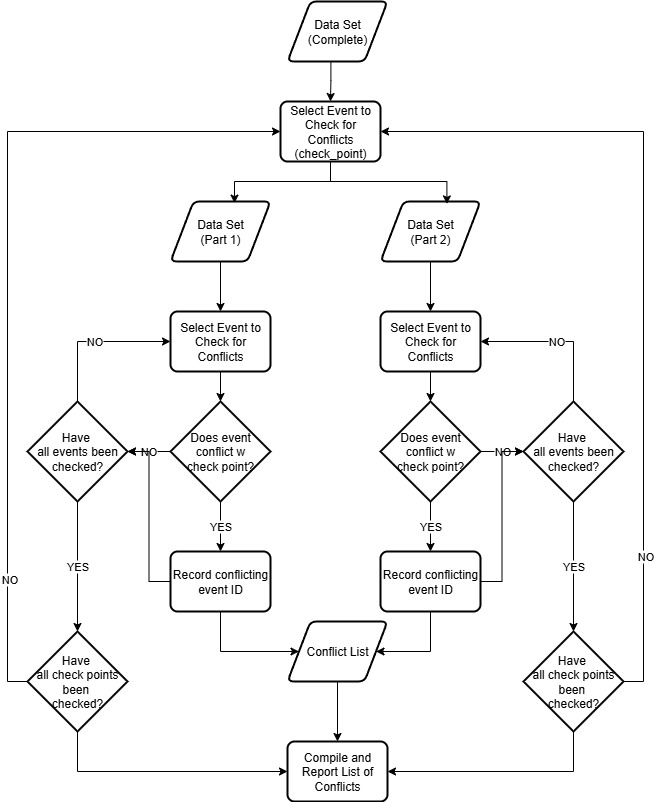



For a data set that has already been sorted by date and time, parallel conflict detection would be a useful implementation to handle checking multiple simultaneous new inputs from users for conflicts. There would be less utility in a general parallel search because the data is already organized to minimize the time to identify the candidate events for possible conflicts. In this scenario, the data set could be broken out by time increments (months, quarters, etc.) or by date and time and then by location (building, section of campus, etc.) or type of facility (class rooms, conference rooms, workspaces, etc.) or a combination of these elements. Each new event input would be assessed to determine what section of the data set it should be checked against and then put in queue for that section. The benefits of this configuration would be for a large volume of new event inputs. This would also allow the conflict identification to be done in conjunction with the event insertion process, which would execute the applicable search algorithm to identify where in the data set the event should be added and then to check the new event against the existing events for date, time, and location conflicts.

Depending on how a multi-core approach was implemented and how the events were distributed among the cores, the division of the data set among the cores could function as a psuedo-indexing. This would allow the direction of a search to a specific core based on relevant criteria, which would again reduce the number of events required to be checked for conflicts.

## Part E. Teamwork
Document roles and modules contributed

### Swejal Gabhane
- Responsible for Searching

### Abhinav Mehrotra
- Created class structures
- Wrote code for implementation of ArrayList and LinkedList
- Wrote unit test for all functions

### Erin Noonan
- Responsible for Conflict Detection and associated testing
- Developed code for generating random event data for testing
- Developed code for running functions for different sizes of data sets and comparing data in a plot
- Parallel conflict detection write up


### John Shuford
- Responsible for Sorting Events
